<a href="https://colab.research.google.com/github/katprog/TestServer/blob/master/Copy_of_Copy_of_idz_stroke_popova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# idz_stroke_popova
# Загружаем данные в колаб
from google.colab import files
files.upload()

Saving stroke_test.csv to stroke_test.csv
Saving stroke_train.csv to stroke_train.csv


{'stroke_test.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\r\n66063,Female,17.0,0,0,No,Private,Urban,133.19,17.8,never smoked,0\r\n29240,Female,8.0,0,0,No,children,Urban,92.53,17.6,,0\r\n12733,Female,69.0,0,0,Yes,Govt_job,Urban,105.58,26.9,never smoked,0\r\n45906,Female,48.0,0,0,Yes,Private,Urban,67.39,25.6,,0\r\n10130,Female,10.0,0,0,No,children,Rural,91.6,29.1,,0\r\n26041,Female,74.0,0,0,Yes,Self-employed,Urban,76.5,25.5,never smoked,0\r\n59106,Female,34.0,0,0,No,Private,Rural,62.8,31.3,never smoked,0\r\n53369,Female,51.0,0,0,Yes,Private,Rural,131.34,28.0,formerly smoked,0\r\n46769,Female,32.0,0,0,Yes,Private,Rural,90.08,28.9,,0\r\n25293,Female,68.0,1,0,Yes,Self-employed,Urban,102.49,37.1,never smoked,0\r\n51065,Female,81.0,0,0,Yes,Self-employed,Rural,232.96,37.6,,0\r\n54022,Female,78.0,0,0,Yes,Self-employed,Rural,67.9,35.3,never smoked,0\r\n44001,Female,39.0,0,0,Yes,Private,Urban,55.28,31.5,,0\r\n1

In [3]:
# Проверяем что файлы загружены
!ls

sample_data  stroke_test.csv  stroke_train.csv


In [0]:
from numpy.random import seed
seed(987)
from tensorflow import set_random_seed
set_random_seed(987)


In [5]:
# Читем данные
import numpy as np
import pandas as pd

data_train = pd.read_csv('stroke_train.csv')
data_test = pd.read_csv('stroke_test.csv')

data_train.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,15784,Female,33.0,0,0,Yes,Private,Rural,79.53,23.1,never smoked,0
1,16049,Male,48.0,0,0,Yes,Govt_job,Rural,74.12,NaN,smokes,0
2,23616,Female,32.0,0,0,No,Private,Urban,69.83,22.0,never smoked,0
3,52824,Female,59.0,0,0,Yes,Private,Rural,146.97,30.1,never smoked,0
4,22322,Female,31.0,0,0,No,Private,Rural,69.27,28.9,NaN,0
5,52668,Female,24.0,0,0,No,Private,Urban,65.44,23.6,never smoked,0
6,51841,Male,33.0,0,0,Yes,Self-employed,Rural,64.04,35.6,smokes,0
7,62383,Female,25.0,0,0,No,Private,Rural,98.88,28.8,never smoked,0
8,45203,Male,18.0,0,0,No,Govt_job,Rural,110.30,35.7,never smoked,0
9,22896,Female,54.0,0,0,Yes,Private,Rural,109.27,43.8,formerly smoked,0


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,0.385638,56.367340,0.210106,0.134309,0.799202,2.131649,0.490691,115.931875,25.903989,1.414894,0.500000
std,0.487070,21.646871,0.407655,0.341210,0.400864,0.988595,0.500246,53.746957,11.658051,1.012934,0.500333
min,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,55.310000,0.000000,0.000000,0.000000
25%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.870000,22.475000,1.000000,0.000000
50%,0.000000,62.000000,0.000000,0.000000,1.000000,2.000000,0.000000,95.935000,27.300000,2.000000,0.500000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,3.000000,1.000000,133.867500,32.400000,2.000000,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,60.900000,3.000000,1.000000


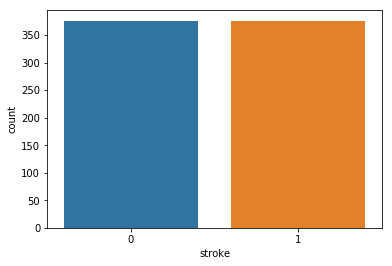

In [30]:
def data_to_matrix_width_scaler(input_data):
  import copy
  data = copy.copy(input_data)
  x = data.drop(['stroke','age', 'avg_glucose_level', 'bmi'], axis='columns').values
  x_for_ss = data[['age', 'avg_glucose_level', 'bmi']].values
  y = data['stroke'].values
  from sklearn.preprocessing import StandardScaler
  ss = StandardScaler()
  x_for_ss = ss.fit_transform(x_for_ss)
  x = np.hstack((x, x_for_ss))
  return x, y

  
def data_to_matrix(data):
  x = data.drop(['stroke'], axis='columns').values
  y = data['stroke'].values
  return x, y

def normalize_data(input_data):
  import copy
  data = copy.copy(input_data)
  count_class_0, count_class_1 = data_train['stroke'].value_counts()
  class_0 = data[data['stroke'] == 0]
  class_1 = data[data['stroke'] == 1]
  class_0_under = class_0.sample(count_class_1)
  under = pd.concat([class_0_under, class_1], axis=0)
  return under

  
# Предобработка данных
def data_prepare(input_data, is_train=False):
  import copy
  data = copy.copy(input_data)
  # Убираем лишние столбцы и непонятные значения
  data = data.drop(['id'], axis='columns') # Удаляем стольбец id
  data['gender'].replace(to_replace='Other', value='Male', inplace=True) # Все значения 'Other' в столбце 'gender' заменяем на 'Male' (совсем удалить их нельзя, т.к. они есть в тестовых данных)
  # Убираем NaN значения в в столбцах smoking_status и bmi(попробовать заменить на среднее = 28.599687)
  #data['bmi'].fillna(28.599687, inplace=True) # count nan = 681
  
  if is_train:
    #data['bmi'].fillna(-1, inplace=True)
    #data = data.loc[data['bmi'] != -1]   
    #data['smoking_status'].fillna('No info', inplace=True)
    #data = data.loc[data['smoking_status'] != 'No info']
    pass
  else:
    data['bmi'].fillna(0, inplace=True) # count nan = 681
    data['smoking_status'].fillna('No info', inplace=True) # для колонки для NaN водим еще одну категорию, count nan = 6369
    pass
  
  # приводим категориальные признаки к количественными с помощью pandas
  # gender, ever_married, work_type, Residence_type, smoking_status
  for cat in data.select_dtypes('O').columns:
    data[cat] = data[cat].astype('category').cat.codes
  # маштабируем количественные признаки
  # ... пока без маштабирования
  return data
  
  
data_train_done = data_prepare(data_train)
data_test_done = data_prepare(data_test)
#data_train_new['gender'].value_counts() 
#data_train_new.isna().sum()

# Нормализуем данные
# ...
data_train_done = normalize_data(data_train_done) # (752, 11) / 376
import seaborn as sns
sns.countplot("stroke",data=data_train_done)

#x_train, y_train = data_to_matrix(data_train_done)
#x_test, y_test = data_to_matrix(data_test_done)

x_train, y_train = data_to_matrix_width_scaler(data_train_done)
x_test, y_test = data_to_matrix_width_scaler(data_test_done)


#data_train_done.head()
#print(data_train_done.shape)
data_train_done.describe()


(752, 10)
(752,)
(5208, 10)
(5208,)
acc = 0.6029185867895546 | prec = 0.037054409005628515 | rec = 0.8404255319148937


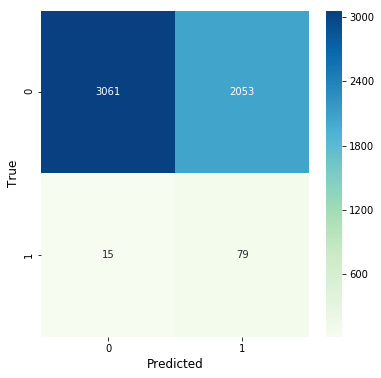

In [35]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


# Дерево решений
# маштабирование для дерева решений не нужно
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def plot_confusion_matrix_sns(cm):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.heatmap(cm, annot=True, ax=ax, cmap='GnBu', fmt='g')
    ax.set_ylabel('True', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)

def print_prediction_assessment(predictions, y):
    test_acc = accuracy_score(y, predictions)
    test_prec = precision_score(y, predictions)
    test_recall = recall_score(y, predictions)
    cm = confusion_matrix(y, predictions)
    print('acc =', test_acc, '| prec =', test_prec, '| rec =', test_recall)
    plot_confusion_matrix_sns(cm)
    
    
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=987)
dt = dt.fit(x_train, y_train)

predictions = dt.predict(x_test)
print_prediction_assessment(predictions, y_test)

# Из полученных зеначений видно что точность плохая, попробуем нормализовать данные

acc = 0.5994623655913979 | prec = 0.038461538461538464 | rec = 0.8829787234042553


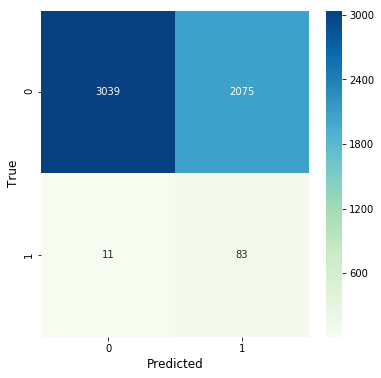

In [32]:
# Рандом форест
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=100)
rf = rf.fit(x_train, y_train)

predictions_rf = rf.predict(x_test)
print_prediction_assessment(predictions_rf, y_test)

In [46]:
# https://medium.com/@yuezhixiong915/handle-the-data-imbalance-and-find-feature-importance-on-health-dataset-acf433b68b2c
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=20, n_estimators=200).fit(x_train,y_train)
# from sklearn.model_selection import GridSearchCV
# param = {'n_estimators':[500,200,100],'min_samples_leaf':[10,20,50]}
# grid = GridSearchCV(clf,param).fit(X_train,y_train)
# print(grid.best_params_)
rf_pred = rf.predict(x_test)
print(rf.score(x_test,y_test))
print(confusion_matrix(y_test,rf_pred))

0.6088709677419355
[[3086 2028]
 [   9   85]]


In [0]:
# Нейронная сеть
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def get_nn_model(input_size):
    input_layer = Input(shape=(input_size,))
    dense1 = Dense(16, activation='relu', kernel_initializer='random_uniform')(input_layer)
    dropout1 = Dropout(0.3, seed=123)(dense1)
    dense2 = Dense(16, activation='relu', kernel_initializer='random_uniform')(dropout1)
    dropout2 = Dropout(0.3, seed=123)(dense2)
    output_layer = Dense(1, activation='sigmoid')(dropout2)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

def loss_graph(epochs, train_loss, val_loss):
    x_axis = np.linspace(1, epochs, num=epochs)
    
    plt.figure(figsize=(10, 7))
    plt.plot(x_axis, train_loss, color='b', lw=3, alpha=0.7, label='Train Loss')
    plt.plot(x_axis, val_loss, color='r', lw=3, alpha=0.7, label='Val Loss')
    plt.title('Loss graph')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)


def acc_graph(epochs, train_acc, val_acc):
    x_axis = np.linspace(1, epochs, num=epochs)
    
    plt.figure(figsize=(10, 7))
    plt.plot(x_axis, train_acc, color='g', lw=3, alpha=0.7, label='Train Accuracy')
    plt.plot(x_axis, val_acc, color='orange', lw=3, alpha=0.7, label='Val Accuracy')
    plt.title('Accuracy graph')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

In [0]:
epochs = 500

nn_model = get_nn_model(10)
logs = nn_model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=0)

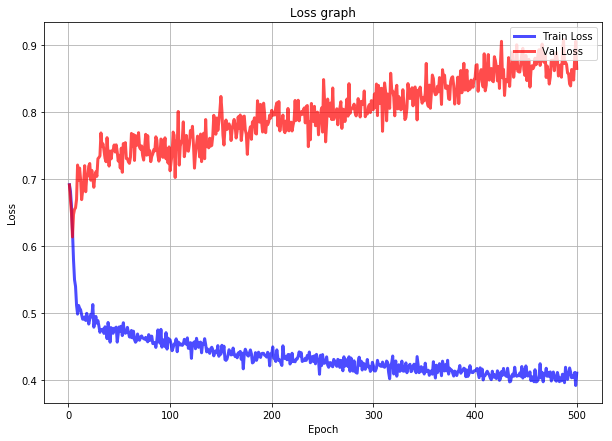

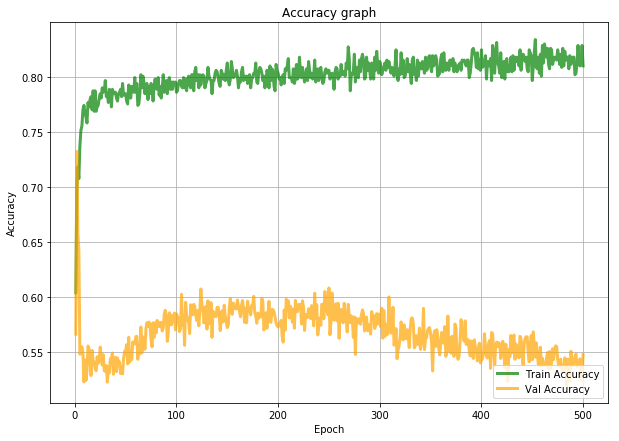

In [51]:
loss_graph(epochs, logs.history.get('loss'), logs.history.get('val_loss'))
acc_graph(epochs, logs.history.get('acc'), logs.history.get('val_acc'))

In [53]:
from sklearn.metrics import accuracy_score

y_pred_proba = nn_model.predict(x_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print(accuracy_score(y_test, y_pred))

0.5474270353302612
